In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.stats import linregress
from decimal import Decimal

In [2]:
# import csv-file
df = pd.read_csv(r'/Users/joakimpihl/Desktop/DTU/7. Semester/Bachelorprojekt/Results/GaussOnNormal/Resonance freq.csv', delimiter=',', encoding='utf-8')
t_star = df.iloc[:,2]
x_values = np.arange(0, len(t_star))

In [3]:
# make a gaussian
mean = np.mean(t_star)
std = np.std(t_star)
gauss = np.random.normal(mean, std, len(t_star))

In [11]:
# remove n data points
n = 75
x_values2 = x_values[n:]
t_star2 = t_star[n:]

# split data into two arrays
m = 200
x_values2_1 = x_values2[:m]
t_star2_1 = t_star2[:m]

x_values2_2 = x_values2[m+6:]
t_star2_2 = t_star2[m+6:]


# make linear regression
result2_1 = linregress(x_values2_1, t_star2_1)
slope2_1 = result2_1.slope
intercept = result2_1.intercept
y_hat2_1 = slope2_1 * x_values2_1 + intercept

result2_2 = linregress(x_values2_2, t_star2_2)
slope2_2 = result2_2.slope
intercept = result2_2.intercept
y_hat2_2 = slope2_2 * x_values2_2 + intercept 

print(slope2_1)
print(slope2_2)

0.005603449209188396
-0.0006468651077866331


/var/folders/_9/ksvk49dn1ldbcjx952d6_3hh0000gn/T/ipykernel_45912/4048876894.py:38: UserWarning: The label '_nolegend_' of <matplotlib.collections.PathCollection object at 0x169b15cd0> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])
/var/folders/_9/ksvk49dn1ldbcjx952d6_3hh0000gn/T/ipykernel_45912/4048876894.py:38: UserWarning: The label '_nolegend_' of <matplotlib.collections.PathCollection object at 0x169b14890> starts with '_'. It is thus excluded from the legend.
  ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])


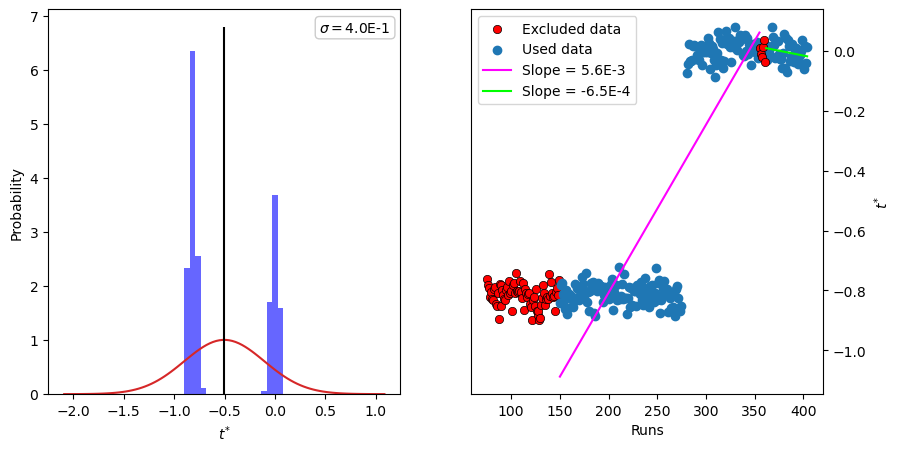

In [12]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')
textstr = r"$\sigma = $" + f"{Decimal(str(std)):.1E}"
ax[0].text(0.77, 0.97, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))

# Add labels and title
ax[0].set_xlabel(r'$t^{\mathrm{*}}$')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=6.785, color='black')

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values[:n], t_star[:n], color = "red",edgecolors='black',linewidths=0.5)
#colors = np.where(x_values > m +6 > len(x), 'purple', 'b')
ax[1].scatter(x_values[n:n+m], t_star[n:n+m], color = "tab:blue")
ax[1].scatter(x_values[n+m+6:], t_star[n+m+6:], color = "tab:blue")
ax[1].scatter(x_values[n+m:n+m+6], t_star[n+m:n+m+6], color = "red",edgecolors='black',linewidths=0.5)

ax[1].plot(x_values2_1, y_hat2_1, color="magenta")
ax[1].plot(x_values2_2, y_hat2_2, color="lime")

# Add labels and title
ax[1].set_xlabel('Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend(['Excluded data', 'Used data', "_nolegend_", "_nolegend_", "Slope = " + f"{Decimal(str(slope2_1)):.1E}", "Slope = " + f"{Decimal(str(slope2_2)):.1E}"])
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution.png', dpi=350,bbox_inches = "tight")


In [13]:
# merge to arrays
x_values = np.concatenate((x_values2_1, x_values2_2))
t_star = np.concatenate((t_star2_1-y_hat2_1, t_star2_2-y_hat2_2))

In [14]:
# make a gaussian
mean = np.mean(t_star)
std = np.std(t_star)
gauss = np.random.normal(mean, std, len(t_star))

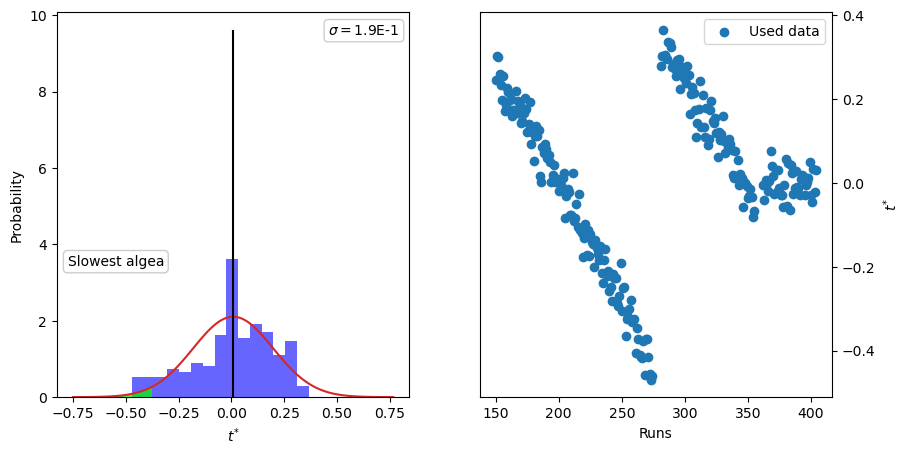

In [15]:
# create side by side sub plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

## plot left side subplot
# Plot the histogram
ax[0].hist(t_star, bins=int(np.floor(np.sqrt(len(t_star)))), density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std**2))
ax[0].plot(x, pdf, color='tab:red')
ax[0].fill_between(x, 0, pdf, where=x < mean - 2 * std, color='lime', alpha=0.7)
textstr = r"$\sigma = $" + f"{Decimal(str(std)):.1E}"
ax[0].text(0.77, 0.97, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
textstr = "Slowest algea"
ax[0].text(0.03, 0.37, textstr, transform=ax[0].transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))
ax[0].annotate("", xy=(0.9, 1), xytext=(0.9, 4),
            arrowprops=dict(arrowstyle="->"))

# Add labels and title
ax[0].set_xlabel(r'$t^{\mathrm{*}}$')
ax[0].set_ylabel('Probability')
ax[0].vlines(x=mean, ymin=0, ymax=9.6, color='black')

## plot right side subplot

# plot the scatter plot
ax[1].scatter(x_values, t_star, color="tab:blue")

# Add labels and title
ax[1].set_xlabel('Runs')
ax[1].set_ylabel(r'$t^{\mathrm{*}}$')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].legend(['Used data'])
# save the plot
plt.savefig(r'C:\Users\Phili\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Images for Overleaf\Gauss-distribution-corrected.png', dpi=350,bbox_inches = "tight")

[ 0.05256262  0.03337917  0.02218627 -0.00711051  0.00946032 -0.01263833
 -0.01686934  0.01880781  0.02528076 -0.03158749 -0.03713292  0.00523764
 -0.08173329  0.03534089  0.03162525 -0.03728673  0.01754257  0.00040436
 -0.01265418 -0.0174505   0.01589987  0.0265807  -0.00120497  0.04573697
  0.00642613  0.01301359 -0.05430126  0.03148658  0.0381364   0.00468967
  0.0720045   0.01119387  0.00780093  0.0122478   0.04606749  0.00845244
 -0.00951892  0.03910791 -0.05224203  0.01802944  0.00670979 -0.00790626
  0.002096    0.00624021 -0.02938374 -0.03993032 -0.08347396 -0.01724346
 -0.00700765 -0.03852331  0.0197319  -0.05357644 -0.06588771 -0.05555391
 -0.08254075 -0.07867491 -0.03565989 -0.0117648   0.03282273  0.0063346
 -0.03250294 -0.01404558 -0.00692302 -0.01319915  0.06835732 -0.00433157
  0.04156155  0.00756688 -0.00805653 -0.00417703 -0.05555359  0.00776894
  0.02207199  0.00081552  0.0505243  -0.02751098  0.03406959  0.03830393
  0.00267478 -0.01798487 -0.04691302  0.01506356 -0.